# Introducción a la Complejidad Computacional Cuántica
$\textit{escrito por Adriano Lusso}$

## Estructura del notebook

El objetivo central de este notebook es estudiar la clase de problemas $BQP$ (Bounded error Quantum Polynomial Time). Tambien se estudiará las ventajas y limitaciones de la computación cuántica cuando se hace uso de un $\textit{modelo de caja negra}$, el bestiario de las otras clases de complejidad cuántica y demas temas relevante.

Para llevar a cabo exitosamente la lectura de este notebook, $\textbf{se requieren conocimiento introductorios}$ sobre $\textbf{computación cuántica}$ y $\textbf{complejidad computacional clásica}$.

## Conceptos básicos

### Computabilidad y complejidad computacional

En la teoría de la computación, hay dos rubros de gran relevancia y conectados profundamente entre sí. El primero de ellos es la $\textbf{teoría de la computabilidad}$, establecido por Godel, Turing y otros teoricistas de su época. En este campo, se crearon conceptos como la noción de que es la computabilidad y como puede representarse con un modelo conocido como $\textit{Máquinas de Turing}$. El objetivo principal es categorizar entre que tipos de problemas son computables y cuales no lo son. 

Por otro lado, la $\textbf{teoría de la complejidad}$ trabaja sobre los problemas que previamente se han demostrado como computables. Ahora, lo que se busca es categorizar estos problemas en función de cuantos recursos consumen para lograr correctamente su ejecución. Los recursos que mas suelen usarse para estas categorizaciones de clase son el tiempo y el espacio ocupado. Este campo teórico fue el que establecio una de las preguntas sin respuesta mas importante de las ciencias de la computación:  $P=NP?$. En forma coloquial, se pregunta si la clase de problemas que pueden resolverse con una computadora clásica en tiempo polinomial es igual a la clase de problemas que pueden resolverse con una computadora clásica en tiempo exponencial. Si bien la mayoría de teoricos apuntan a que la respuesta a esta pregunta es que no son iguales, a día de hoy no se ha logrado una demostración formal que verifique o contradiga esta inclinación por parte de investigadores.

### Mecánica cuántica

La mecánica cuántica es la rama de la física que estudia el comportamiento de la naturaleza a escala de átomos y de partículas subatómicas. Esta rama plantea muchas situaciones, de indole física, las cuales se contradicen con la teoría clásica de la física. Informalmente, plantea un marco en el que muchas posibilidades pueden suceder a la vez. Esto es algo que se siente poco intuitivo para un razonamiento clásica de como se comportan las cosas. Un ejemplo para esto es:

    Que un único fotón, dada la posibilidad de eligir entre dos rendijas, pueda mostrar marcas de oscuridad y luz. Esto viola principios básicos de probabilidad clásica.
    
Si se deja de lado el apartado físico de la mecánica cuántica, y nos concentramos unicamente el su representación matematica, se vuelve más facil de entender. Principalmente, puede entendersela como una extensión de la estadística clásica. Un bit de una computadora clásica puede escribirse como un vector que representa la probabilidad de que ese vector sea $0$ o que sea $1$. Debe respetarse que la norma $L1$ del vector sea igual a $1$.

$\text{bit 0} =\begin{pmatrix}
1\\
0
\end{pmatrix}$,
$\text{bit 1} =\begin{pmatrix}
0\\
1
\end{pmatrix}$

Por otro lado, un operador en una computadora clásica puede escribirse como una matriz, en la que la norma $L2$ de los elementos de cada columna debe ser igual a $1$.

$\text{compuerta NOT} =\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}$

La pregunta que surge ahora es, ¿Podemos tener un estado (bit clásico) que tenga $50\%$ de probabilidades de ser $1$ y $50\%$ de ser $0$? La respuesta es sí, y en la computación se lo conoce como $\textbf{bit probabilístico}$.

$\text{bit probabilístico} = \begin{pmatrix}
0.5\\
0.5
\end{pmatrix}$

Esta misma idea puede aplicarse a los operadores. Por ejemplo, podriamos crear un operador que, si la entrada es $0$, tenga un $40\%$ de probabilidades de que mantenga su valor; y si la entrada es $1$, que tenga $75\%$ de probabilidades de que mantenga su valor. 


$ \text{operador probabilístico} = \begin{pmatrix}
0.4 & 0.25\\
0.6 & 0.75\\
\end{pmatrix}$

Si ahora modificamos las condiciones respecto a la norma $L1$ para vectores y columnas de operadores y hacemos que su respectiva norma $L2$ sea igual a $1$, logramos obtener estados y compuertas cuánticas. Los estados cuánticos de menor tamaño posibles son los $\textbf{qubits}$. A su vez, un estado cuántico puede estar formado por miles y miles de qubits.

$| 0 \rangle = \begin{pmatrix}
1\\
0
\end{pmatrix}$,    $| 1 \rangle = \begin{pmatrix}
0\\
1
\end{pmatrix}$,   $\frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle = \begin{pmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{pmatrix}$,     $ H = \begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}$




### Computación cuántica: uniendo los conceptos básicos

Un estado cúantico con $n$ qubits se compone de $2^n$ vectores de estado, donde cada vector tiene su amplitud representada por un número complejo. Esto significa que, para trabajar con $1000$ párticulas...La naturaleza debe mantener registro de $2^{1000}$ números complejos! En base a este razonamiento nacio el concepto de la computación cuántica, el cual busca poner este inmenso poder de computo, innato de la naturaleza, a trabajar para nosotros. Pero,¿Realmente existe alguna función que tome tiempo más que polinomial en computarse en una computadora clásica, pero que solo tome tiempo polinomial en una computadora cuántica?

Responder esta pregunta es crucial, ya que en su respuesta afirmativa yace la motivación a querer desarrollar este nuevo paradigma de computo.

## Clase BQP

### Definición

Formalmente, se define a $BQP$ como a la clase de lenguajes $L \subset \{0,1\}^*$ para los que existe una familia uniforme de circuitos cuánticos de tamaño polinomial $C_n$, un conjunto base de compuertas universales y un polinomial $q$ de manera que para todo $n$ y entradas $x \in \{0,1\}^n$:

* Si $x \in L$, entonces $C_n(| x \rangle | 0 \rangle^{\otimes q(n)} )$ acepta con una probabilidad mayor a $2/3$.
* Si $x \notin L$, entonces $C_n(| x \rangle | 0 \rangle^{\otimes q(n)} )$ acepta con una probabilidad menor a $1/3$.



### Interpretando la definición

La definición antes dada puede ser dificil de entender, sobre todo para estudiantes que no provengan del campo de las ciencias de la computación. Por lo tanto, trataremos de desarrollar una noción intuitiva de lo que el formalismo trata de definir.

Para que un problema pertenezca a la clase $BQP$ debe cumplir lo siguiente:

* El problema debe poder representarse como un lenguaje $L$ que tenga cadenas formadas por $1$ y $0$. Por ejemplo, $1100110$, $01$, etcetera.
* Debe existir una familia de circuitos que sea...
    - Uniforme: debe existir una maquina de Turing $M$ que permita emular satisfactoriamente el comportamiento de cada uno de los circuitos de la familia en una misma clase temporal. Por ejemplo, si es $P$-uniforme, la maquina de Turing hara la emulacion en tiempo polinomial. Recordemos que las maquinas de Turing son, al igual que los circuitos, otro modelo para representar computación.
    - De tamaño polinomial: que la cantidad de compuertas requeridas para construir cada uno de los circuitos de la familia se pueda obtener a traves de una función polinomial en $n$, siendo $n$ la cantidad de variables entrantes del circuito. Por ejemplo, para un conjunto de $n$ bits, si queremos computar la paridad de estos, podemos crear el circuito $XOR$. Este circuito usara $O(n)$ compuertas. Es decir, la cantidad de compuertas se determina polinómicamente en función de $n$.
* Debe existir un conjunto base de compuertas universales. Esto es, un conjunto de compuertas a traves de las cuales puedas construir cualquier otro tipo de compuertas, en base a combinarlas entre sí.

Cada circuito de la familia uniforme recibira entradas de un determinado tamaño $n$. Entonces, para cada uno de estos circuitos, cada posible entrada de tamaño $n$, que tendra la forma de una cadena de $1$ y $0$ de tamaño $n$, se debe cumplir que:

* Si $x$ pertenece a $L$ (recordemos que $L$ es un lenguaje que, si cumple todas las condiciones, pertenecera a $BQP$) entonces el circuito aceptara a esta cadena con una probabilidad mayor a los $2/3$.
* Si $x$ no pertenece a $L$, el circuito aceptara a esta cadena con una probabilidad menor a $1/3$. Dicho de otra forma, rechazara a la cadena con probabilidad mayor a $2/3$.

Es importante destacar que esta clase es de $\textbf{error acotado}$, pero no significa que no exista error. Si no existiera error alguno, siempre que una cadena perteneciera a $L$, sería aceptada. Pero en el caso de $BQP$, solo puede garantizar con una probabilidad mayor a $2/3$ que se acepte exitosamente la cadena. Es decir, aún existe probabilidad de error.

### Propiedades de BQP

La imagen que se ve a continuación describe como se ubica la clase $BQP$ en la jerarquía de clases clásicas.

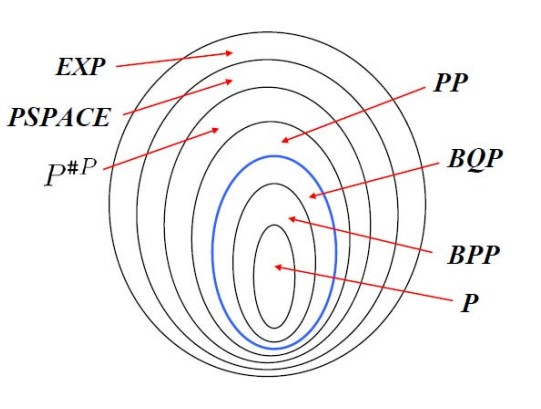

In [2]:
from PIL import Image
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\jerarquiaPolinomial.jpg')
display(img)

* $P \subseteq BPQ$

Es trivial entender que un circuito cuántico puede emular cualquier circuito clásico.

* $BPP \subseteq BQP$

Como las propiedades de la mecánica cuántica otorgar aleatoriedad, un circuito cuántico puede resolver cualquier cosa que una computadora clásica probabilística pueda resolver. El factor de aleatoriedad puede verse facilmente al medir un qubit al que se le ha aplicado la compuerta $H$.

* $BPP \subseteq EXP$

Los estados cuánticos se escriben como una combinación lineal de otros estados cuánticos. Es decir, $| y \rangle = \sum \alpha_x | x \rangle$. Por lo tanto, podemos usar computadoras clásicas probabilísticas para emular la evolución de los estados vectoriales en tiempo exponencial.

* $BQP \subseteq PSPACE$

VER DESPUES NO ENTENDI

* $BPQ \subseteq P^{\#P} \subseteq PSPACE$

$\#P$ Es la clase de problemas de conteo. Hay una clase de problemas de decisión( problemas con respuesta $SI$ o $NO$), que es la clase $P$ con un oráculo $\#P$, notado $P^{\#P}$. Como los problemas de conteo pueden resolverse en espacio polinomial, $P^{\#P} \subseteq PSPACE$. A su vez, $\#P$ puede seguir todos los caminos posibles de forma no determinística en el integral de caminos de Feynman, con lo que podemos determinar que $BPQ \subseteq P^{\#P} $.

* $BQP \subseteq PP$

$PP$ incluye a los problemas que se resuelven probabilísticamente en tiempo polinomial y con probabilidad de exito igual o mayor al $50\%$. Esta clase no es realizable físicamente. $PP$ es la versión para problemas de decisión de $\#P$. Esto significa que no podemos contar el numero caminos aceptados en una máquina de Turing no deterministica, pero podemos preguntar si el número de caminos aceptados es mayor o menor al de caminos rechazados.
SEGUIR DESPUES PORQUE SE COMPLEJIZA

mecanica cuantica definicion: https://es.wikipedia.org/wiki/Mec%C3%A1nica_cu%C3%A1ntica

normaL1L2: https://platzi.com/clases/1725-algebra-lineal/23886-tipos-de-normas-norma-0-norma-1-norma-2-norma-infi/#:~:text=La%20norma%20L1%3A%20devuelve%20la,del%20vector%20desde%20su%20origen.